In [272]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [318]:
def Y(x, alpha=1):
    return -np.sin(x) + x/10 + alpha*(1/(1+np.abs(x)) + 0.01)*np.random.randn()
def S(x, alpha=1):
    return alpha*(1/(1+np.abs(x)) + 0.01) if abs(x) <= 15 else 0.0
def Ys(x, alpha=1):
    return -np.sin(x) + x/10 + alpha*(1/(1+np.abs(x)) + 0.01)

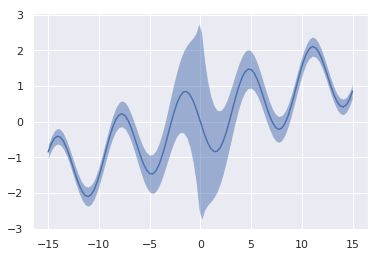

In [319]:
plt.plot(list(np.linspace(-15, 15, 100)), list(map(lambda x:Ys(x, 0), list(np.linspace(-15, 15, 100)))))
plt.fill_between(list(np.linspace(-15, 15, 100)), list(map(lambda x:Ys(x, 3), list(np.linspace(-15, 15, 100)))), list(map(lambda x:Ys(x, -3), list(np.linspace(-15, 15, 100)))), alpha=0.5)
plt.savefig("test-func.pdf", bbox_inches='tight', dpi=300)

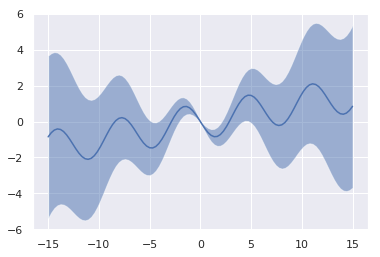

In [301]:
def Y(x, alpha=1):
    return -np.sin(x) + x/10 + alpha*(np.abs(x)/10 + 0.01)*np.random.randn()
def S(x, alpha=1):
    return alpha*(np.abs(x)/10 + 0.01) if abs(x) <= 15 else 0.0
def Ys(x, alpha=1):
    return -np.sin(x) + x/10 + alpha*(np.abs(x)/10 + 0.01)
plt.plot(list(np.linspace(-15, 15, 100)), list(map(lambda x:Ys(x, 0), list(np.linspace(-15, 15, 100)))))
plt.fill_between(list(np.linspace(-15, 15, 100)), list(map(lambda x:Ys(x, 3), list(np.linspace(-15, 15, 100)))), list(map(lambda x:Ys(x, -3), list(np.linspace(-15, 15, 100)))), alpha=0.5)
plt.savefig("test-func.pdf", bbox_inches='tight', dpi=300)

In [320]:
x = [[np.random.randn() * 5] for _ in range(1000)]
X = x
y = list(map(Y, [x[0] for x in X]))

In [321]:
Xt = np.transpose([list(np.linspace(-25, 25, 2000))])
yt = list(map(Y, list(np.linspace(-25, 25, 2000))))

In [322]:
def write(X, y, file):
    with open(file, "w") as f:
        for i in range(len(y)):
            f.write("{y}\t{y}\t{x}\n".format(y=y[i], x='\t'.join(map(str, X[i]))))

In [323]:
write(X, y, "tr.tsv")
write(Xt, yt, "tt.tsv")

In [324]:
N = len(y)
beta = N + 0.
shrinkage = 0.5 / N
predictions = []
num = 10
best_iters = 10000
best_lr = 0.01
best_rs = 0.0
best_depth = 2
num_ensembles = 1
y_train_std = np.std(y, ddof=0)
y_train_mean = np.mean(y)
for index in range(num_ensembles):# 
    !./ngboost fit -f tr.tsv -t tt.tsv --cd pool.cd  --bootstrap-type Bernoulli --subsample 0.5 --use-best-model False --depth 6 --learning-rate 0.01 --random-strength 0 --leaf-estimation-method Gradient --loss-function MultiRMSE:mean=$y_train_mean\;std=$y_train_std --iterations 10000 --seed $index -m out___.m --langevin True --diffusion-temperature 1000 --model-shrink-rate 0.0005 
    for i in range(num):
        trees = best_iters - i * 500
        !./ngboost calc -m out___.m --input-path tt.tsv -o out___.tsv --cd pool.cd --prediction-type RawFormulaVal --tree-count-limit $trees > stdoutapply.txt
        with open("out___.tsv") as f:
            tmp = [x.strip().split('\t') for x in f.readlines()[1:]]
            CC = (1 - best_lr * shrinkage) ** (-i * 500)
            predictions.append([[y_train_mean + CC * float(x[1]), np.exp(np.log(y_train_std) + CC * float(x[2]))] for x in tmp])
        

0:	learn: 0.8218651	test: 1.8970626	best: 1.8970626 (0)	total: 2.52ms	remaining: 25.2s
1:	learn: 0.8113312	test: 1.8421600	best: 1.8421600 (1)	total: 4.69ms	remaining: 23.5s
2:	learn: 0.8029576	test: 1.7909711	best: 1.7909711 (2)	total: 6.66ms	remaining: 22.2s
3:	learn: 0.7936124	test: 1.7476376	best: 1.7476376 (3)	total: 8.79ms	remaining: 22s
4:	learn: 0.7853961	test: 1.7055346	best: 1.7055346 (4)	total: 11.3ms	remaining: 22.6s
5:	learn: 0.7773951	test: 1.6823919	best: 1.6823919 (5)	total: 13.4ms	remaining: 22.4s
6:	learn: 0.7698259	test: 1.6580632	best: 1.6580632 (6)	total: 15ms	remaining: 21.4s
7:	learn: 0.7624476	test: 1.6416454	best: 1.6416454 (7)	total: 16.6ms	remaining: 20.7s
8:	learn: 0.7554822	test: 1.6238147	best: 1.6238147 (8)	total: 18.2ms	remaining: 20.2s
9:	learn: 0.7484426	test: 1.5919322	best: 1.5919322 (9)	total: 19.9ms	remaining: 19.8s
10:	learn: 0.7416162	test: 1.5614717	best: 1.5614717 (10)	total: 21.5ms	remaining: 19.5s
11:	learn: 0.7348137	test: 1.5458271	best: 1.

In [325]:
N = len(y)
beta = N + 0.
shrinkage = 1.0 / N
predictions_ = []
num = 1
best_iters = 1000
best_lr = 0.01
best_rs = 0.0
best_depth = 2
num_ensembles = 10
y_train_std = np.std(y, ddof=0)
y_train_mean = np.mean(y)
for index in range(num_ensembles):# 
    !./ngboost fit -f tr.tsv -t tt.tsv --cd pool.cd  --bootstrap-type Bernoulli --subsample 0.5 --use-best-model False --depth 6 --learning-rate 0.01 --random-strength 0 --leaf-estimation-method Gradient --loss-function MultiRMSE:mean=$y_train_mean\;std=$y_train_std --iterations 1000 --seed $index -m out___.m --langevin True --diffusion-temperature 1000 --model-shrink-rate 0.0005 
    for i in range(num):
        trees = best_iters - i * 100
        !./ngboost calc -m out___.m --input-path tt.tsv -o out___.tsv --cd pool.cd --prediction-type RawFormulaVal --tree-count-limit $trees > stdoutapply.txt
        with open("out___.tsv") as f:
            tmp = [x.strip().split('\t') for x in f.readlines()[1:]]
            CC = (1 - best_lr * shrinkage) ** (-i * 100)
            predictions_.append([[y_train_mean + CC * float(x[1]), np.exp(np.log(y_train_std) + CC * float(x[2]))] for x in tmp])
        

0:	learn: 0.8218651	test: 1.8970626	best: 1.8970626 (0)	total: 2.16ms	remaining: 2.15s
1:	learn: 0.8113312	test: 1.8421600	best: 1.8421600 (1)	total: 4.18ms	remaining: 2.09s
2:	learn: 0.8029576	test: 1.7909711	best: 1.7909711 (2)	total: 6.14ms	remaining: 2.04s
3:	learn: 0.7936124	test: 1.7476376	best: 1.7476376 (3)	total: 8.57ms	remaining: 2.13s
4:	learn: 0.7853961	test: 1.7055346	best: 1.7055346 (4)	total: 10.4ms	remaining: 2.07s
5:	learn: 0.7773951	test: 1.6823919	best: 1.6823919 (5)	total: 12.2ms	remaining: 2.02s
6:	learn: 0.7698259	test: 1.6580632	best: 1.6580632 (6)	total: 13.8ms	remaining: 1.96s
7:	learn: 0.7624476	test: 1.6416454	best: 1.6416454 (7)	total: 15.4ms	remaining: 1.91s
8:	learn: 0.7554822	test: 1.6238147	best: 1.6238147 (8)	total: 17.3ms	remaining: 1.9s
9:	learn: 0.7484426	test: 1.5919322	best: 1.5919322 (9)	total: 18.9ms	remaining: 1.87s
10:	learn: 0.7416162	test: 1.5614717	best: 1.5614717 (10)	total: 20.5ms	remaining: 1.84s
11:	learn: 0.7348137	test: 1.5458271	best:

In [326]:
N = len(y)
beta = N + 0.
shrinkage = 1.0 / N
predictions__ = []
num = 1
best_iters = 1000
best_lr = 0.01
best_rs = 0.0
best_depth = 2
num_ensembles = 10
y_train_std = np.std(y, ddof=0)
y_train_mean = np.mean(y)
for index in range(num_ensembles):# 
    !./ngboost fit -f tr.tsv -t tt.tsv --cd pool.cd  --bootstrap-type Bernoulli --subsample 0.5 --use-best-model False --depth 6 --learning-rate 0.01 --random-strength 0 --leaf-estimation-method Gradient --loss-function MultiRMSE:mean=$y_train_mean\;std=$y_train_std --iterations 1000 --seed $index -m out___.m
    for i in range(num):
        trees = best_iters - i * 100
        !./ngboost calc -m out___.m --input-path tt.tsv -o out___.tsv --cd pool.cd --prediction-type RawFormulaVal --tree-count-limit $trees > stdoutapply.txt
        with open("out___.tsv") as f:
            tmp = [x.strip().split('\t') for x in f.readlines()[1:]]
            CC = (1 - best_lr * shrinkage) ** (-i * 100)
            predictions__.append([[y_train_mean + CC * float(x[1]), np.exp(np.log(y_train_std) + CC * float(x[2]))] for x in tmp])
        

0:	learn: 0.8218658	test: 1.8970704	best: 1.8970704 (0)	total: 1.76ms	remaining: 1.76s
1:	learn: 0.8116992	test: 1.8660931	best: 1.8660931 (1)	total: 2.96ms	remaining: 1.48s
2:	learn: 0.8018448	test: 1.8144133	best: 1.8144133 (2)	total: 4.33ms	remaining: 1.44s
3:	learn: 0.7924118	test: 1.7675215	best: 1.7675215 (3)	total: 5.66ms	remaining: 1.41s
4:	learn: 0.7839139	test: 1.7390263	best: 1.7390263 (4)	total: 7.08ms	remaining: 1.41s
5:	learn: 0.7758902	test: 1.7112574	best: 1.7112574 (5)	total: 8.34ms	remaining: 1.38s
6:	learn: 0.7683029	test: 1.7004288	best: 1.7004288 (6)	total: 9.69ms	remaining: 1.37s
7:	learn: 0.7607283	test: 1.6795828	best: 1.6795828 (7)	total: 11ms	remaining: 1.36s
8:	learn: 0.7535852	test: 1.6571891	best: 1.6571891 (8)	total: 12.3ms	remaining: 1.36s
9:	learn: 0.7463054	test: 1.6403663	best: 1.6403663 (9)	total: 13.8ms	remaining: 1.36s
10:	learn: 0.7392022	test: 1.6111391	best: 1.6111391 (10)	total: 15.1ms	remaining: 1.35s
11:	learn: 0.7322287	test: 1.5969764	best: 

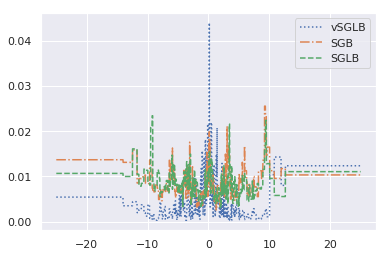

In [327]:
std = np.array(list(map(np.std, np.transpose([np.transpose(x)[0] for x in predictions]))))
std2 = np.array(list(map(np.std, np.transpose([np.transpose(x)[0] for x in predictions_]))))
std3 = np.array(list(map(np.std, np.transpose([np.transpose(x)[0] for x in predictions__]))))



#mean = np.array(list(map(np.mean, np.transpose([np.transpose(x)[0] for x in predictions]))))


plt.plot(np.transpose(Xt)[0], std, label="vSGLB", linestyle=':', alpha=1)
plt.plot(np.transpose(Xt)[0], std3, label="SGB", linestyle='-.', alpha=1)
plt.plot(np.transpose(Xt)[0], std2, label="SGLB", linestyle='dashed', alpha=1)


#plt.plot(list(np.linspace(-15, 15, 2000)), list(map(lambda x:S(x, 1), list(np.linspace(-15, 15, 2000)))), label="True", color='red')

#plt.ylim([0.0, 0.2])
plt.legend()
#plt.fill_between(np.transpose(Xt)[0], mean+3*std, mean-3*std, alpha=0.1)
plt.savefig("knowledge-unc.pdf", bbox_inches='tight', dpi=300)

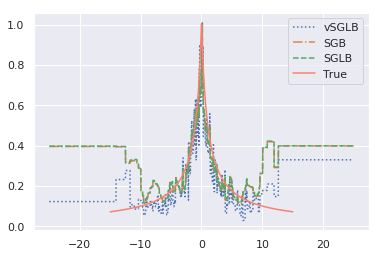

In [328]:
std = np.array(list(map(np.mean, np.transpose([np.transpose(x)[1] for x in predictions]))))
std2 = np.array(list(map(np.mean, np.transpose([np.transpose(x)[1] for x in predictions_]))))
std3 = np.array(list(map(np.mean, np.transpose([np.transpose(x)[1] for x in predictions__]))))



#mean = np.array(list(map(np.mean, np.transpose([np.transpose(x)[0] for x in predictions]))))


plt.plot(np.transpose(Xt)[0], std, label="vSGLB", linestyle=':', alpha=1)
plt.plot(np.transpose(Xt)[0], std3, label="SGB", linestyle='-.', alpha=1)
plt.plot(np.transpose(Xt)[0], std2, label="SGLB", linestyle='dashed', alpha=1)




plt.plot(list(np.linspace(-15, 15, 2000)), list(map(lambda x:S(x, 1), list(np.linspace(-15, 15, 2000)))), label="True", color='salmon')


plt.legend()
#plt.fill_between(np.transpose(Xt)[0], mean+3*std, mean-3*std, alpha=0.1)
plt.savefig("data-unc.pdf", bbox_inches='tight', dpi=300)